In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle_superstore as w
from datetime import date
import viz
from matplotlib import style
style.use('ggplot')

# PROJECT OVERVIEW

The goal of this project is to analyze sales from superstore db and present information to the VP of Products to guide the decision making process. Data contains transactions from 2014-2017 with multiple categories, sub categories, and brands.

**Primary Question: which product line to expand?**

Due to limited data we focused mostly on which sub-category to expand and included some additional information on brands within that sub-category.

***

# Acquiring Data

Data is stored in codeup's SQL database and accessed through a python library called `pandas`. The query is written in `MySQL` and is contained in `wrangle_superstore.py` module. This module pulls the data, does some cleaning, preparation, and feature engineering and returns a pandas dataframe.

***

# Preparing Data

As mentioned above, the prep is done in `wrangle_superstore.py`. The data is cleaned and prepared for analysis. 
The following steps are performed:
1. change column names to lowercase
2. replace spaces and - with underscores
3. drop redundant columns ("customer_name", "region_id", "category_id", "country", "product_id"])
4. convert "order_date" and "ship_date" to datetime objects
5. convert postal code to object
6. convert index to order_date
7. sort index
8. add columns for "unit cost", "unit profit", "brand", "product line"
9. round dollar amounts to 2 decimal places

In [2]:
df = w.wrangle_superstore() # this acquires and preps the data
df.head(3)

Using cached csv


,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,11.78,...,0.2,4.27,Office Supplies,Labels,Avery 508,Central,4.91,1.4239,Avery,Avery_Labels
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,3.54,...,0.8,-5.49,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Central,8.85,-2.7435,GBC,GBC_Binders
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,272.74,...,0.2,-64.77,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Central,113.64,-21.5916,SAFCO,SAFCO_Storage


### Spliting is not done in this project. Due to lack of modeling and data.
***

## Exploratory Data Analysis

Here will answer a few basic questions about the data and determine which product line to expand.

### Q1. Is there a product category that is particularly profitable for us? 

In [3]:
# show profit by category
df.groupby('category').profit.sum().sort_values(ascending=False).head(10)

category
Office Supplies    19312.29
Technology         19251.38
Furniture           -623.15
Name: profit, dtype: float64

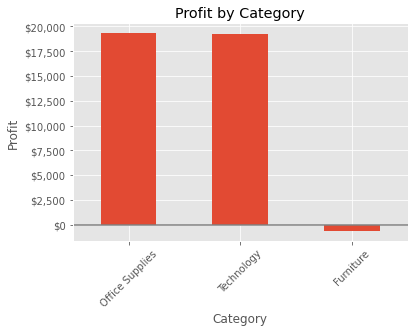

In [4]:
viz.graph_profit_by_category(df)

### Q2: Does one or another stand out in terms of sales volume?

In [5]:
# show quantity by category
df.groupby('category').quantity.sum().sort_values(ascending=False).head(10)

category
Office Supplies    3974.0
Furniture          1401.0
Technology         1205.0
Name: quantity, dtype: float64

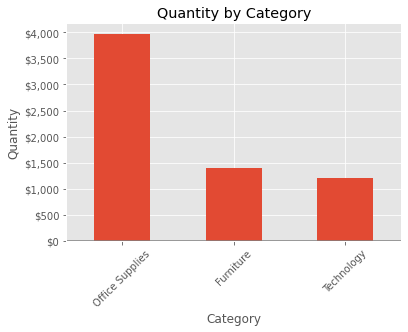

In [6]:
viz.graph_quantity_by_category(df)

Q3: Does this vary by customer segment?

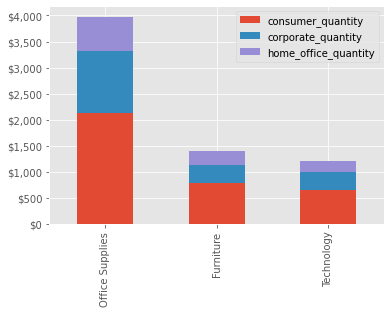

In [7]:
viz.graph_quantity_by_category_segment(df)

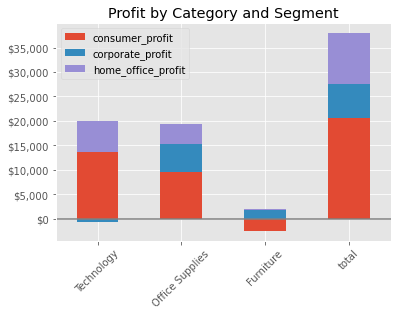

In [8]:
viz.graph_profit_by_category_segment(df)

### Final Question: Which product line to expand?
We can look at all the profits over time and then hone in on the best sub catergory to expand.

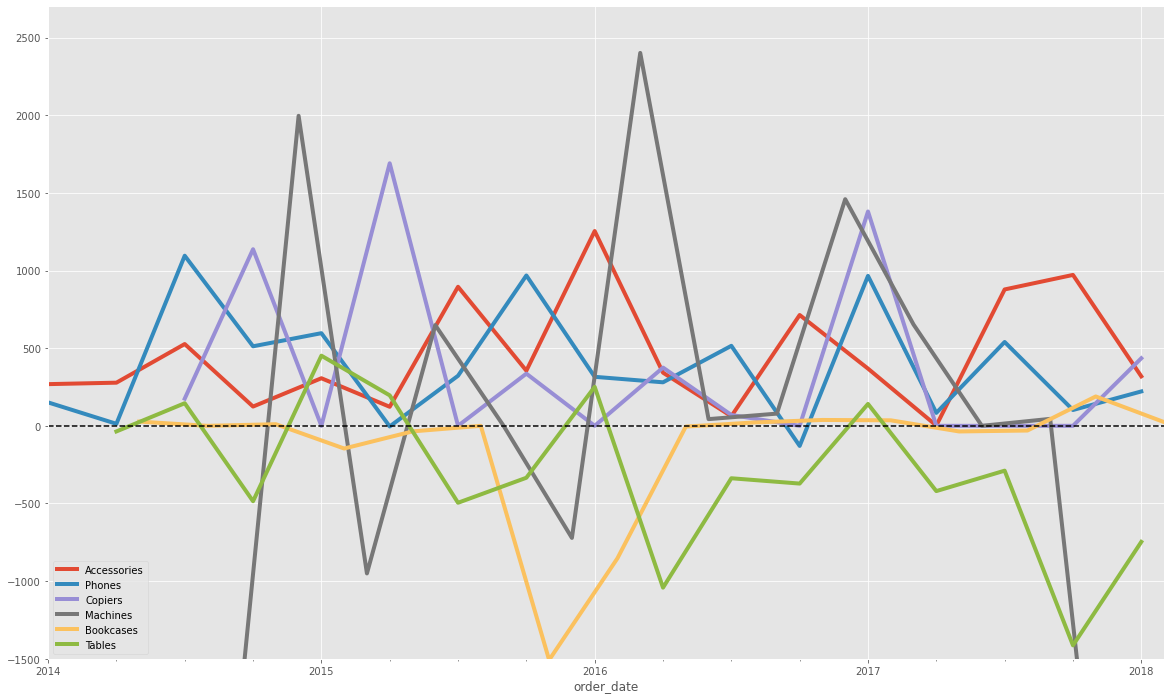

In [9]:
viz.graph_top_and_bottom_sub_categories(df)

/Users/teceno/codeup-data-science/time-series-project/viz.py:162: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


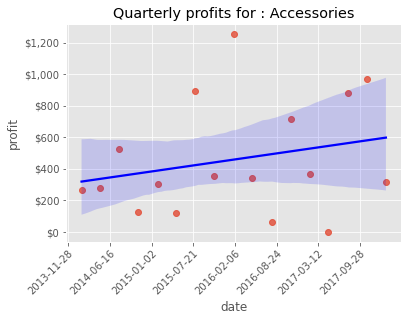

In [10]:
viz.graph_quarterly_profit(df, "Accessories")

### Summarize explore data

## Conclusion

## Recommendations